In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt

#required resources; download once
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

Targeted column name: content
                                       Original_Text  Proper Noun  Noun  \
0  ['sometim', 'power', 'christma', 'make', 'wild...          162     9   
1  ['awaken', 'strand', 'dna', 'reconnect', 'movi...           67     1   
2  ['never', 'hike', 'alon', 'friday', 'fan', 'fi...          234     6   
3  ['rare', 'shark', 'caught', 'scientist', 'left...          161     8   
4  ['donald', 'trump', 'unnerv', 'abil', 'abil', ...          109     5   

   Adjective  Pronoun  Other  Verb  Preposition  Adverb  Determiner  \
0          9        4    550     4            7       0           0   
1          2        0    211     0            4       1           0   
2          3        1    682     2            9       1           2   
3          3        1    582     0           10       0           1   
4          5        0    339     2            6       0           0   

   Conjunction  
0            0  
1            0  
2            0  
3            0  
4      

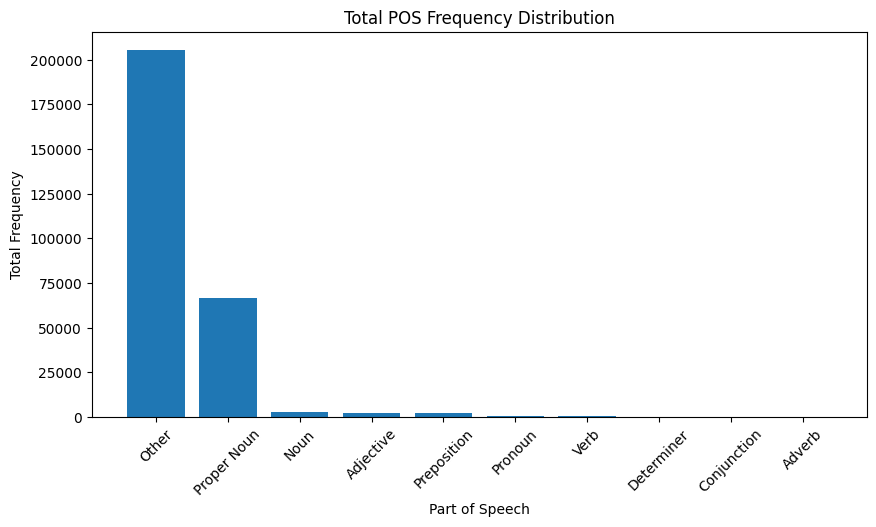

In [4]:
df = pd.read_csv('data/news_sample_6.csv')

column_index = 5
if df.shape[1] > column_index:
    text_column = df.iloc[:, column_index].dropna().astype(str)  # Convert to string
    print(f"Targeted column name: {df.columns[column_index]}")  # Print column name
else:
    raise IndexError("CSV does not have 5 columns!")

# POS Tag Mapping for Readability
pos_mapping = {
    "NN": "Noun", "NNS": "Noun", "NNP": "Proper Noun", "NNPS": "Proper Noun",
    "VB": "Verb", "VBD": "Verb", "VBG": "Verb", "VBN": "Verb", "VBP": "Verb", "VBZ": "Verb",
    "JJ": "Adjective", "JJR": "Adjective", "JJS": "Adjective",
    "RB": "Adverb", "RBR": "Adverb", "RBS": "Adverb",
    "PRP": "Pronoun", "PRP$": "Pronoun", "WP": "Pronoun", "WP$": "Pronoun",
    "DT": "Determiner",
    "IN": "Preposition",
    "CC": "Conjunction",
    "UH": "Interjection"
}

# Function to process each row
def process_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    
    # Convert POS tags to human-readable format
    readable_tags = [pos_mapping.get(tag, "Other") for _, tag in pos_tags]
    
    # Count occurrences of each word class
    pos_counts = {pos: readable_tags.count(pos) for pos in set(readable_tags)}
    
    return pos_counts

# Apply function to each row and create a new DataFrame
df_pos = text_column.apply(process_text).apply(pd.Series).fillna(0).astype(int)

# Add original text for reference
df_pos.insert(0, "Original_Text", text_column)

# Display result
print(df_pos.head())

# Save to CSV
df_pos.to_csv("pos_analysis.csv", index=False)

# Optional: Aggregate and plot total POS counts
pos_totals = df_pos.drop(columns=["Original_Text"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(pos_totals.index, pos_totals.values)
plt.xlabel("Part of Speech")
plt.ylabel("Total Frequency")
plt.title("Total POS Frequency Distribution")
plt.xticks(rotation=45)
plt.show()